# Brazil soy - Trase data sample analysis

This notebook guides you through some sample analysis of Brazil soy data from Trase, using Python and the pandas package.

By following the steps on this notebook, you should have a basic understanding of how to use Trase data to conduct your own analysis on Brazil soy.

In [1]:
import pandas as pd

You can download data for Brazil soy from Trase here: https://trase.earth/open-data/supply-chains/brazil-soy.

In [2]:
df = pd.read_csv("data/brazil-soy-v2.6.0-2024-01-17.csv.gz")

Let's look at a sample row of data:

In [3]:
df.iloc[100]

year                                                                             2004
biome                                                                  MATA ATLANTICA
country_of_production                                                          BRAZIL
forest_500_soy                                                                    NaN
zero_deforestation_brazil_soy                                               {UNKNOWN}
state                                                                          PARANA
municipality_of_production                                                     PINHAO
logistics_hub                                                              GUARAPUAVA
port_of_export                                                                    NaN
exporter                                                       PROCESSED DOMESTICALLY
exporter_group                                                 PROCESSED DOMESTICALLY
importer                                              

Each row of this data is **a flow of soy, from its production in Brazil to its consumption domestically or in other countries.** 

Each row represents the following steps of Brazil soy flows:

```
country_of_production (Country where the soy was produced)
|
biome (Biome of production)
|
state (State of production)
|
municipality_of_production (Municipality of production)
|
logistics_hub (Logistics hub)
|
port_of_export (Port from where the soy was exported)
|
exporter (Exporter company)
|
importer (Importer company)
|
country_of_first_import (Country which imported the soy)
```

## Column descriptions

Here's a description of what each of the columns mean: 

| Column                                                         | Description                               | Unit                                      |
|:---------------------------------------------------------------|:------------------------------------------|:------------------------------------------|
| year                                                           | Production year                           |                                           |
| biome                                                          | Production biome                          |                                           |
| country_of_production                                          | Country of production                     |                                           |
| forest_500_soy                                                 |                                           |                                           |
| zero_deforestation_brazil_soy                                  |                                           |                                           |
| state                                                          | State where the soy was produced                       |                                           |
| municipality_of_production                                     | Municipality where the soy was produced                |                                           |
| logistics_hub                                                  |                                           |                                           |
| port_of_export                                                 | Port from where the soy was exported                                          |                                           |
| exporter                                                       | Exporting company                         |                                           |
| exporter_group                                                 | Exporting company, grouped                |                                           |
| importer                                                       | Importing company                         |                                           |
| importer_group                                                 | Importing company, grouped                |                                           |
| country_of_first_import                                        | Importing country                         |                                           |
| economic_bloc                                                  | Economic bloc of import                   |                                           |
| volume                                                         | Volume                                    | tons (in soybean grain equivalents)       |
| fob                                                            | Value of goods (FOB)                      | US dollars                                |
| co2_gross_emissions_soy_deforestation_5_year_total_exposure    | Gross emissions of CO2                    | tons of CO2 equivalents                   |
| co2_net_emissions_soy_deforestation_5_year_total_exposure      | Net emissions of CO2                      |                                           |
| land_use                                                       | Land used to grow the soy                 | hectares                                  |
| soy_deforestation_5_year_total_exposure                        | Exposure to deforestation                 | hectares                                  |
| state_trase_id                                                 | State where the soy was produced (IBGE id)|                                           |
| municipality_of_production_trase_id                            | Municipality where the soy was produced (IBGE id)|                                           |


## Methodology

If you're interested in the methodology behind how this data is produced, please refer to the methodology documents for Brazil soy on our website here: https://trase.earth/open-data/supply-chains/brazil-soy.

## Filtering for latest year available

The dataset we're working with contains several years of data on Brazil soy. Let's filter out to display only the latest year.

In [4]:
df.year.unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020])

In [5]:
df_latest = df[df.year == df.year.max()]

In [6]:
df_latest.year.unique()

array([2020])

## Top importing countries by volume of soy

If we want to see which are the biggest importing countries of Brazil soy by volume, all we need to do is group by the `country_of_first_import` column and sum the `volume` column.

In [7]:
df_latest.groupby(['country_of_first_import'])['volume'].sum().sort_values(ascending=False)

country_of_first_import
CHINA (MAINLAND)                  5.315608e+07
BRAZIL                            2.387020e+07
THAILAND                          4.116256e+06
NETHERLANDS                       3.963776e+06
SINGAPORE                         3.911527e+06
                                      ...     
TOGO                              5.850100e+01
CROATIA                           2.628535e+01
ST. VINCENT AND THE GRENADINES    1.721254e+01
CAPE VERDE                        1.492372e+01
COTE D'IVOIRE                     1.472474e+01
Name: volume, Length: 86, dtype: float64

Now let's create a bar chart of the top 10 importers of Brazil soy.

<Axes: xlabel='Volume of soy imported (tonnes), 2020', ylabel='Country of import'>

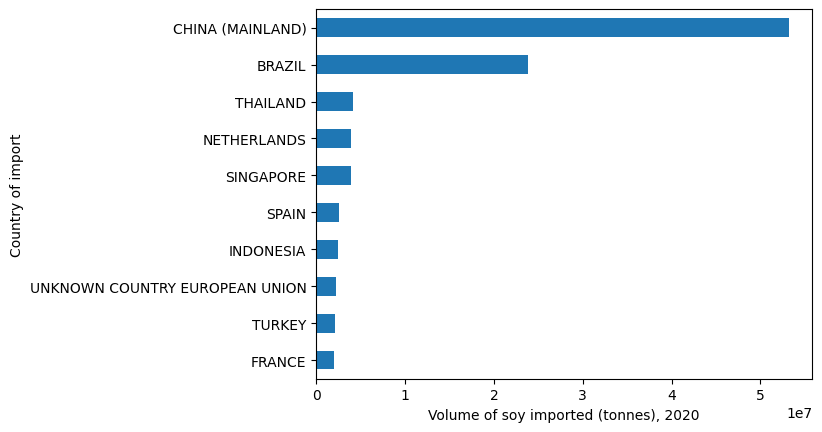

In [9]:
(df_latest.groupby(['country_of_first_import'])['volume'].sum()
    .sort_values(ascending=False)
    .head(n=10)
    .sort_values(ascending=True)
    .plot.barh(xlabel='Volume of soy imported (tonnes), 2020', ylabel='Country of import')
)

Note: we can see that Brazil is ranked second on that list of importing countries. This is because we have domestic consumption data for Brazil soy included in this dataset.

## Top importing countries by deforestation exposure

Our dataset also includes a few other interesting metrics, such as:

```
fob
co2_gross_emissions_soy_deforestation_5_year_total_exposure
co2_net_emissions_soy_deforestation_5_year_total_exposure
land_use
soy_deforestation_5_year_total_exposure
``` 

You can see the column descriptions at the beginning of this notebook for more details on these metrics.

For now, let's look at the top importing countries by **deforestation exposure**.

<Axes: xlabel='Deforestation exposure (ha), 2020', ylabel='Country of import'>

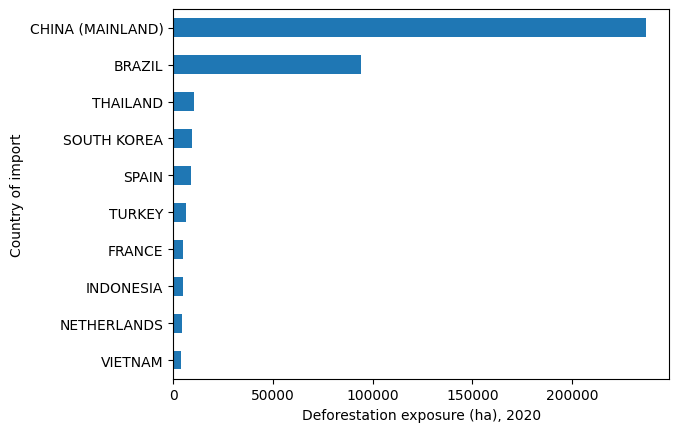

In [10]:
(df_latest.groupby(['country_of_first_import'])['soy_deforestation_5_year_total_exposure'].sum()
    .sort_values(ascending=False)
    .head(n=10)
    .sort_values(ascending=True)
    .plot.barh(xlabel='Deforestation exposure (ha), 2020', ylabel='Country of import')
)

## Top exporting companies

We can apply this same logic to several other columns in our dataset. For example, we might want to see which are the biggest exporting companies by deforestation exposure.

For this, we'll use the `exporter_group` instead of the `exporter` column, since `exporter_group` already conveniently groups companies which are subsidiaries into their parent companies.

<Axes: xlabel='Deforestation exposure (ha), 2020', ylabel='Exporter company'>

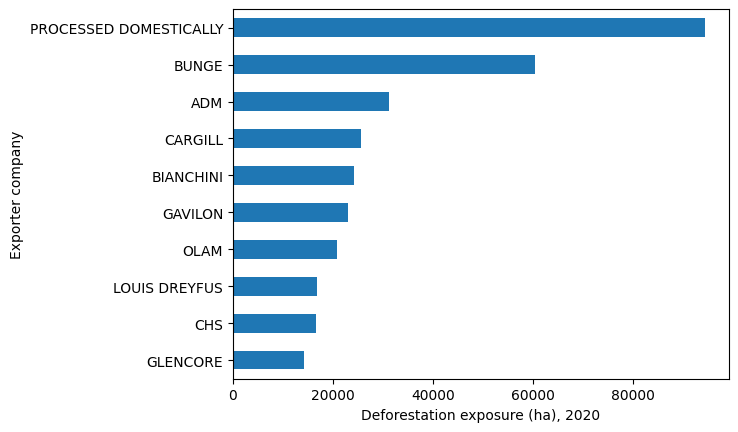

In [11]:
(df_latest.groupby(['exporter_group'])['soy_deforestation_5_year_total_exposure'].sum()
    .sort_values(ascending=False)
    .head(n=10)
    .sort_values(ascending=True)
    .plot.barh(xlabel='Deforestation exposure (ha), 2020', ylabel='Exporter company')
)

## A map of deforestation exposure for Brazil soy

Trase data has the names and IDs for the municipalities where the soy was produced in Brazil. This means we can use this data to easily produce a map of deforestation exposure for Brazilian soy.

We will use the `geopandas` library for this.

In [12]:
import geopandas as gpd

In [13]:
br_mun = gpd.read_file("data/brazil-municipalities.geojson")

<Axes: >

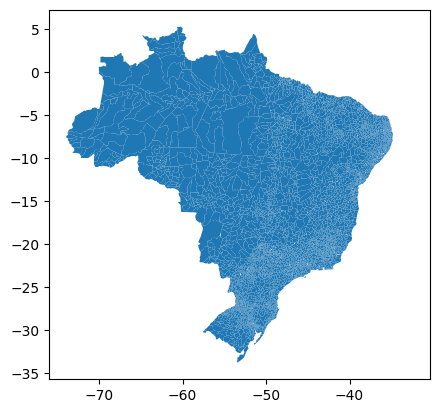

In [14]:
br_mun.plot()

In [15]:
br_mun.head()

,id,name,biome,level,country,trase_id,region_type,geometry
0,BR-5200050,ABADIA DE GOIAS,CERRADO,6,BRAZIL,BR-5200050,MUNICIPALITY,"POLYGON ((-49.38380 -16.83200, -49.44690 -16.7..."
1,BR-3100104,ABADIA DOS DOURADOS,CERRADO,6,BRAZIL,BR-3100104,MUNICIPALITY,"POLYGON ((-47.46400 -18.17740, -47.48490 -18.1..."
2,BR-5200100,ABADIANIA,CERRADO,6,BRAZIL,BR-5200100,MUNICIPALITY,"POLYGON ((-48.91410 -16.08700, -48.93990 -16.1..."
3,BR-3100203,ABAETE,CERRADO,6,BRAZIL,BR-3100203,MUNICIPALITY,"POLYGON ((-45.20740 -18.93260, -45.25760 -18.9..."
4,BR-1500107,ABAETETUBA,AMAZONIA,6,BRAZIL,BR-1500107,MUNICIPALITY,"POLYGON ((-48.83740 -1.52140, -49.00650 -1.570..."


We have loaded the municipalities file for Brazil. We will merge this to our Trase Brazil soy data using the `id` column, which is the IBGE (Brazilian Institute of Geography and Statistics) code for each municipality.

First, we need to prepare our Trase data by grouping it by `municipality_of_production_trase_id` and summing the metric we want to see on the map:

In [16]:
df_latest_by_municipality = df_latest.groupby(['municipality_of_production_trase_id'])[['volume', 'soy_deforestation_5_year_total_exposure']].sum()

Now, let's merge this to the map data:

In [17]:
br_mun_data = br_mun.merge(df_latest_by_municipality, left_on="trase_id", right_on="municipality_of_production_trase_id", how="left")

Let's check if the merge worked:

In [18]:
br_mun_data.head()

,id,name,biome,level,country,trase_id,region_type,geometry,volume,soy_deforestation_5_year_total_exposure
0,BR-5200050,ABADIA DE GOIAS,CERRADO,6,BRAZIL,BR-5200050,MUNICIPALITY,"POLYGON ((-49.38380 -16.83200, -49.44690 -16.7...",238.427927,0.000000
1,BR-3100104,ABADIA DOS DOURADOS,CERRADO,6,BRAZIL,BR-3100104,MUNICIPALITY,"POLYGON ((-47.46400 -18.17740, -47.48490 -18.1...",8773.591669,1.791963
2,BR-5200100,ABADIANIA,CERRADO,6,BRAZIL,BR-5200100,MUNICIPALITY,"POLYGON ((-48.91410 -16.08700, -48.93990 -16.1...",20654.000000,27.077567
3,BR-3100203,ABAETE,CERRADO,6,BRAZIL,BR-3100203,MUNICIPALITY,"POLYGON ((-45.20740 -18.93260, -45.25760 -18.9...",1117.576759,0.000000
4,BR-1500107,ABAETETUBA,AMAZONIA,6,BRAZIL,BR-1500107,MUNICIPALITY,"POLYGON ((-48.83740 -1.52140, -49.00650 -1.570...",NaN,NaN


Finally, let's see it on a map:

<Axes: >

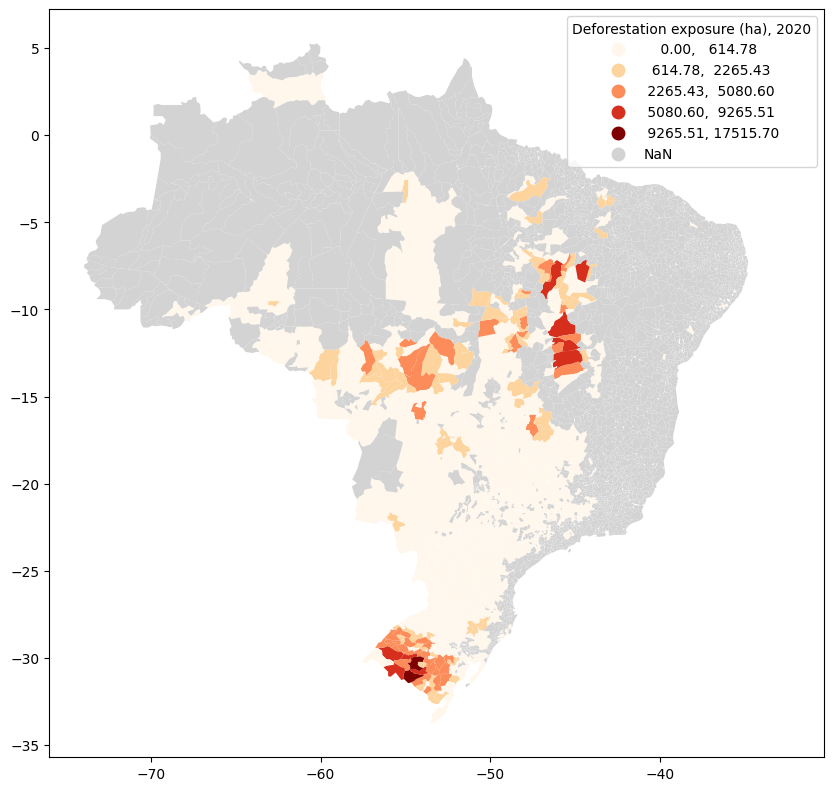

In [19]:
br_mun_data.plot(
    column="soy_deforestation_5_year_total_exposure",
    cmap="OrRd",
    legend=True,
    scheme="natural_breaks",
    legend_kwds={"title": "Deforestation exposure (ha), 2020"},
    missing_kwds={
        "color": "lightgrey",
    },
    figsize=(10,10)
)

## A map of deforestation exposure, but only considering China's imports

There are many interesting ways you can explore Trase data. One of them if by looking at filtered segments of it, for example for certain companies, regions, or countries.

In this example, we'll recreate the map above, but now considering only China's imports of Brazil soy.

<Axes: >

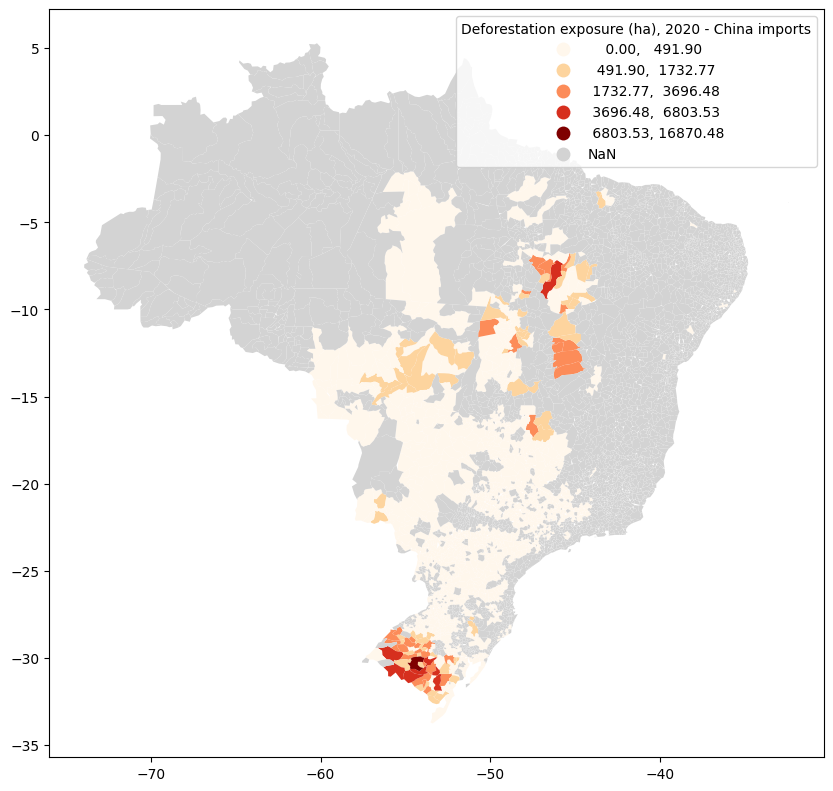

In [20]:
df_latest_china = df_latest[df_latest['country_of_first_import'] == 'CHINA (MAINLAND)']
df_latest_by_municipality_china = df_latest_china.groupby(['municipality_of_production_trase_id'])[['volume', 'soy_deforestation_5_year_total_exposure']].sum()
br_mun_data_china = br_mun.merge(df_latest_by_municipality_china, left_on="trase_id", right_on="municipality_of_production_trase_id", how="left")
br_mun_data_china.plot(
    column="soy_deforestation_5_year_total_exposure",
    cmap="OrRd",
    legend=True,
    scheme="natural_breaks",
    legend_kwds={"title": "Deforestation exposure (ha), 2020 - China imports"},
    missing_kwds={
        "color": "lightgrey",
    },
    figsize=(10,10)
)

We can see above that the pattern is similar to the general pattern of deforestation exposure in Brazil, but with less deforestation exposure in the West-Center (centro-oeste) states.

## Timeseries data

Trase data also allows us to analyse trends over time. Let's look at how the volumes of soy produced in Brazil have changed over time:

In [21]:
df.groupby(['year'])['volume'].sum()

year
2004    4.954994e+07
2005    5.118207e+07
2006    5.246464e+07
2007    5.785717e+07
2008    5.983310e+07
2009    5.734538e+07
2010    6.875634e+07
2011    7.481545e+07
2012    6.584886e+07
2013    8.172448e+07
2014    8.676052e+07
2015    9.746494e+07
2016    9.639482e+07
2017    1.147321e+08
2018    1.179124e+08
2019    1.143168e+08
2020    1.217977e+08
Name: volume, dtype: float64

We can display this on a line chart:

<Axes: xlabel='Year of production', ylabel='Soy produced (tonnes)'>

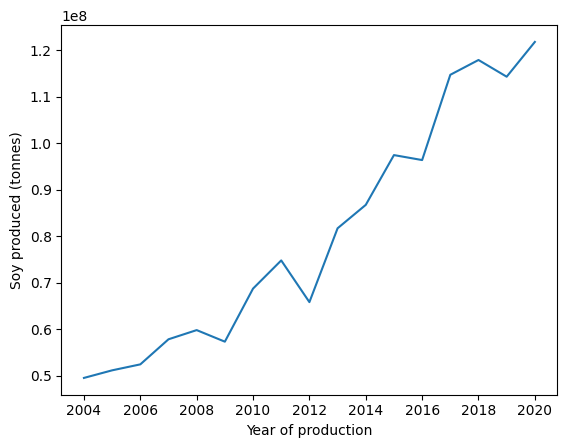

In [22]:
df.groupby(['year'])['volume'].sum().plot.line(xlabel="Year of production", ylabel="Soy produced (tonnes)")

## Explore more

You can now explore more of this data on your own, or use our online exploration tools available at https://trase.earth/.

If you have any questions you can reach out to us at info@trase.earth.